In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [3]:
df.head()
df.rename({'default payment next month':'default_payment_next_month'},axis=1,inplace=True)

The data:

Note that compared to the website's description of the data dictionary, X6-X11 are
called PAY_1-PAY_6 in our data. Similarly, X12-X17 are BILL_AMT1-BILL_AMT6, and
X18-X23 are PAY_AMT1-PAY_AMT6.


1. X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


Note: Repayment is the act of paying back money previously borrowed from a lender.
2. X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
3. X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


LIMIT_BAL: Amount of the credit provided (in New Taiwanese (NT) dollar) including
individual consumer credit and the family (supplementary) credit.

SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 =
others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

AGE: Age (year).




In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# 1. Understand, Clean and Format Data

## Cleaning 'Id' column to get unique ids

In [5]:
# checking if the id column has unique IDs

print("no of unique ids: ",df['ID'].nunique())
print("actual no of ids present in id column" ,df['ID'].shape[0])    


no of unique ids:  29687
actual no of ids present in id column 30000


This means that ids in ID column are not unique.

In [6]:
id_counts = df['ID'].value_counts()
valuecounts = id_counts.value_counts()
print(id_counts)
valuecounts

5ce60722-dbd1    2
e39d23fe-aa5f    2
51e5ff58-5a0f    2
4dc45e9a-27bd    2
1a055566-c187    2
                ..
19c781f7-294d    1
68d2d82b-2bd4    1
6f74a79e-bc52    1
d360ca00-baaa    1
0c2be370-90dd    1
Name: ID, Length: 29687, dtype: int64


1    29374
2      313
Name: ID, dtype: int64

from this we can see that most of the ids occur once. and none of the ids occue more than twice

In [7]:
dupe_mask = id_counts==2
dupe_mask


5ce60722-dbd1     True
e39d23fe-aa5f     True
51e5ff58-5a0f     True
4dc45e9a-27bd     True
1a055566-c187     True
                 ...  
19c781f7-294d    False
68d2d82b-2bd4    False
6f74a79e-bc52    False
d360ca00-baaa    False
0c2be370-90dd    False
Name: ID, Length: 29687, dtype: bool

1. find out ids which appear twice in id column
2. by looking at them we can see that the second apperance of every id has all columns as 0. hence we willl remove only those id rows
3. create new dataframe removing out rows(~ operator) found in step 2


by looking at the entries we can see that the second apperance of every id has all columns expect ID as 0. hence we willl remove only those id rows

In [8]:
df_zeros = df.iloc[:,1:] == 0
feature_id = df_zeros.all(axis=1) # .all =  If all the elements in the passed iterable are true along the axis then returns true else it returns false.

In [9]:
clean_df = df[~feature_id]


In [10]:
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

## Understanding PAY_1 column and cleaning it

In [11]:
clean_df['PAY_1'].value_counts()


0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

looking at this we can see that values 0,-2 are not defined . Also ,because of the Not available value in PAY_1 its datatype is object. Remove rows of the dataset, for which this feature has a missing value

In [12]:
# removing "Not available" rows
clean_df = clean_df[clean_df['PAY_1']!='Not available']

In [13]:
# changing datatype to int64
clean_df['PAY_1'] = clean_df['PAY_1'].astype('int64')


now let,
PAY_1 = -2 means the account started that month with a zero balance, and never used any
credit

• -1 means the account had a balance that was paid in full

• 0 means that at least the minimum payment was made, but the entire balance
wasn't paid (that is, a positive balance was carried to the next month)

## Exploring the Credit Limit and Demographic Features like SEX, EDUCATION, MARRIAGE, and AGE

In [14]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] =80 #.rcParams to set the resolution (dpi = dots per inch) for a nice crisp image

### continuous features

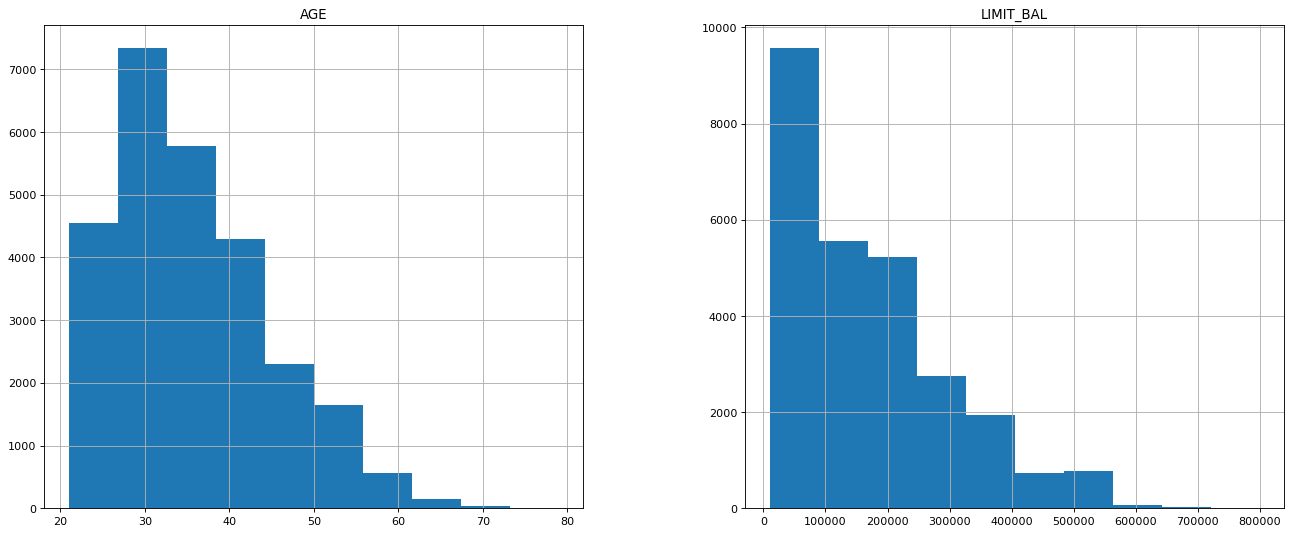

In [15]:

clean_df[['LIMIT_BAL', 'AGE']].hist(figsize=(20,8));
# fig,axes = plt.subplots(1,2)
# axes[0].hist(clean_df['LIMIT_BAL'])



LIMIT_BAL: the credit limit, seems to make sense. The credit limits have a minimum
of 10,000

The AGE feature also looks reasonably distributed, with no one under the age of 21
having a credit account


## Categorical features

#### EDUCATION

In [16]:
clean_df['EDUCATION'].value_counts()


2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

 Here, we see undocumented education levels 0, 5, and 6, as the data dictionary
describes only "Education (1 = graduate school; 2 = university; 3 = high school; 4
= others)".

Hence putting these category in to "others" category

In [17]:
clean_df['EDUCATION'].replace(to_replace=[0,5,6] ,value=4, inplace=True)


In [18]:
clean_df['EDUCATION'].value_counts()


2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

#### MARRIAGE

In [19]:
clean_df['MARRIAGE'].value_counts()


2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [20]:
clean_df['MARRIAGE'].replace(to_replace=0 ,value=3, inplace=True)

In [21]:
clean_df['MARRIAGE'].value_counts()


2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

### Hypothesis for 'PAY_1' and 'LIMIT_BAL'

for PAY_1 : Accounts with
delayed payments last month, were accounts that could be considered in default

people who have
defaulted before are probably at the highest risk of defaulting again

for LIMIT_BAL : Thinking about how credit limits are
assigned, it is likely that our client has assessed how risky a borrower is when deciding
their credit limit. Riskier clients should be given lower limits, so the creditor is less
exposed. Therefore, we may expect to see a higher probability of default, for accounts
with lower values of LIMIT_BAL.

### analysing PAY_1

In [22]:
#Calculate a baseline for the response variable of the default rate across the whole dataset using.mean():
overall_default_rate = clean_df['default_payment_next_month'].mean()
overall_default_rate

0.2217971797179718

In [23]:
#What would be a good way to visualize default rates for different values of thePAY_1 feature? :groupby/mean
groupby_pay_mean_y = clean_df.groupby('PAY_1').agg({'default_payment_next_month':np.mean})
groupby_pay_mean_y.sort_values(by='default_payment_next_month')

,default_payment_next_month
PAY_1,
0,0.128295
-2,0.131664
-1,0.170002
1,0.336400
5,0.434783
6,0.545455
8,0.588235
4,0.682540
2,0.694701


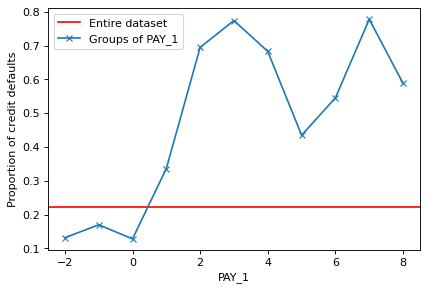

In [24]:
# In Matplotlib, every plot exists on an axes, and within a figure window. By creating objects for axes and figures, 
# you can directly access and change their properties,including axis labels, tick marks, and other things on the axes,
# or the dimensions of the figure.

# 1. Create an axes object in a variable also called axes, using the following code:
axes = plt.axes()

# 2. Plot the overall default rate as a red horizontal line. you just have to indicate the y-intercept of this line
# with the axhline function.
axes.axhline(overall_default_rate,color='red')

# 3.over this line, we want to plot the default rate within each group of PAY_1 values.
groupby_pay_mean_y.plot(marker='x', ax=axes,legend=False)
axes.set_ylabel("Proportion of credit defaults")
axes.legend(['Entire dataset','Groups of PAY_1']);



Our visualization of payment statuses has revealed a clear, and probably expected,
story: those who defaulted before, are in fact more likely to default again. The
default rate of accounts in good standing is well below the overall default rate,
which we know from before is about 22%. However, at least 30% of the accounts
that were in default last month will be in default again next month, according to
this.

### analysing LIMIT_BAL

In [25]:
pos_mask = clean_df['default_payment_next_month'] == 1
neg_mask = clean_df['default_payment_next_month'] == 0

In [26]:
clean_df['LIMIT_BAL'].max() # gives 800000
bin_edges = list(range(0,800000,50000))

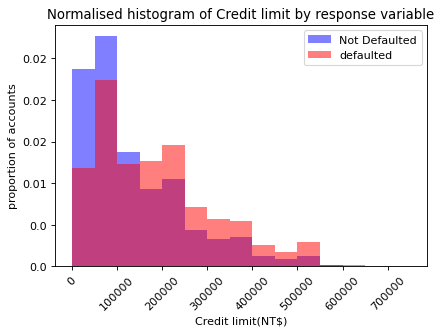

In [27]:


axes = plt.axes()
axes.hist(clean_df[pos_mask].LIMIT_BAL,alpha=0.5, color = 'blue',bins =bin_edges,density=True)
axes.hist(clean_df[neg_mask].LIMIT_BAL, axes = axes,alpha=0.5,color='red',bins =bin_edges,density=True)
axes.tick_params(axis='x',labelrotation=45 )
axes.set_xlabel('Credit limit(NT$)')
axes.set_ylabel('proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*5000,2))
axes.legend(['Not Defaulted','defaulted'])
axes.set_title('Normalised histogram of Credit limit by response variable');


the accounts that default tend to
have a higher proportion of lower credit limits. Accounts with credit limits less than
NT$150,000 are relatively more likely to default, while the opposite is true for accounts
with limits higher than this.

Our
hypothesis was that the client would give riskier accounts lower limits. This intuition is
compatible with the higher proportions of defaulters with lower credit limits that we
observed here.

## Implementing OHE for a Categorical Feature

OHE = One Hot Encoding

In [28]:
# convert numbers in EDUCATION column to their respective category

mapping = {1: 'graduate_school', 2 :'university', 3 : 'high_school', 4: 'others'}
ss = clean_df['EDUCATION'].map(mapping)


In [29]:
set1 = pd.get_dummies(ss)  # using one hot encoding 
#concatenate set1 with clean_df dataset
clean_df = pd.concat([clean_df,set1], axis=1)

In [30]:
clean_df.head() #### this is the final cleaned datafram


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,graduate_school,high_school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,0,0,0,1


In [31]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_feats

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [32]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

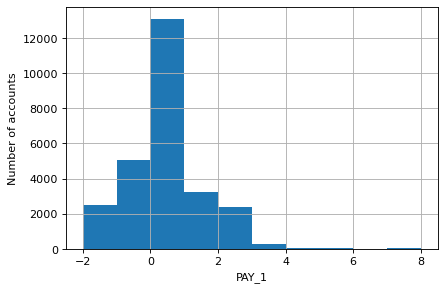

In [33]:
clean_df['PAY_1'].hist()
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')


In [34]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

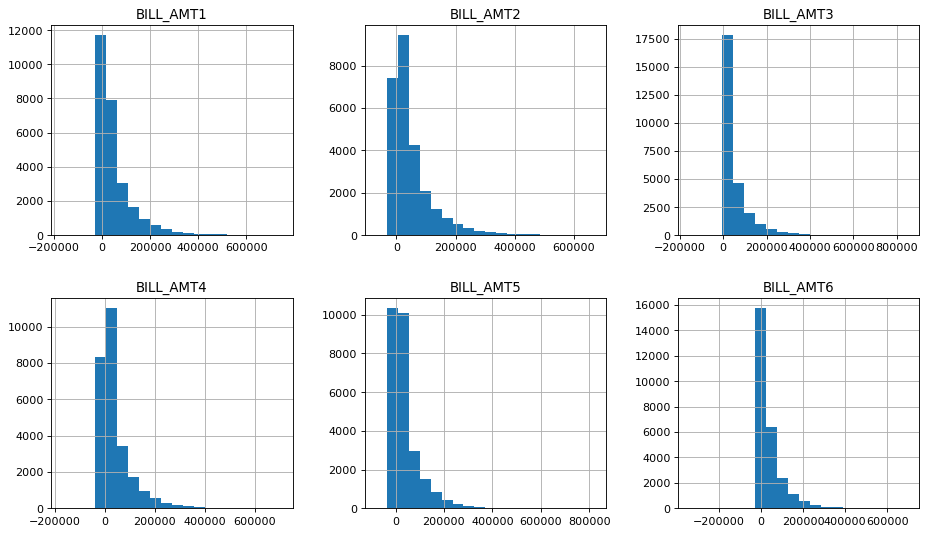

In [35]:

clean_df[bill_feats].hist(bins=20,layout=(2,3),figsize=(14,8));

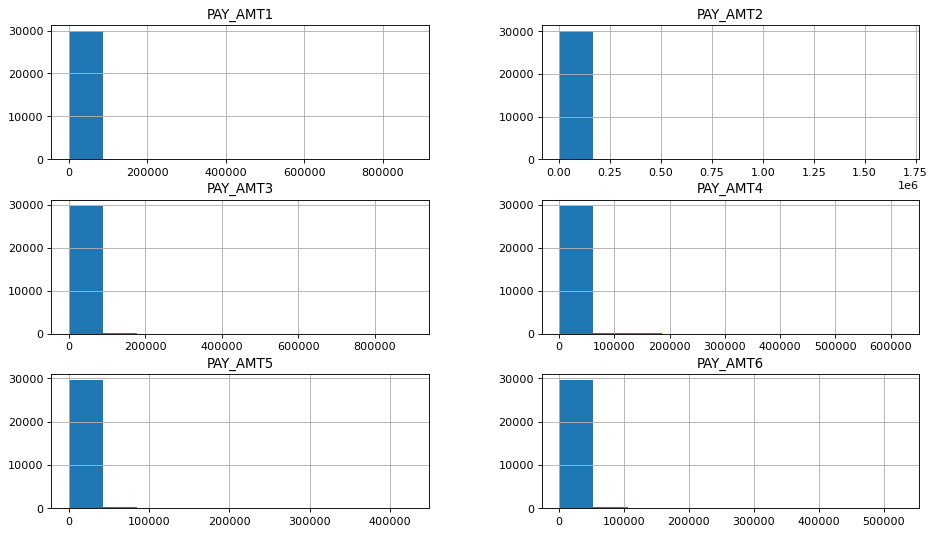

In [36]:
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[pay_amt_feats].hist(figsize=(14,8));


A quick glance at this figure indicates that this is not a very informative graphic;
there is only one bin in most of the histograms that is of any noticeable height.
This is not an effective way to visualize this data. It appears that the monthly
payment amounts are mainly in a bin that includes 0. How many are in fact 0?

PAY_AMT1    5504
PAY_AMT2    5663
PAY_AMT3    6223
PAY_AMT4    6660
PAY_AMT5    6955
PAY_AMT6    7416
dtype: int64


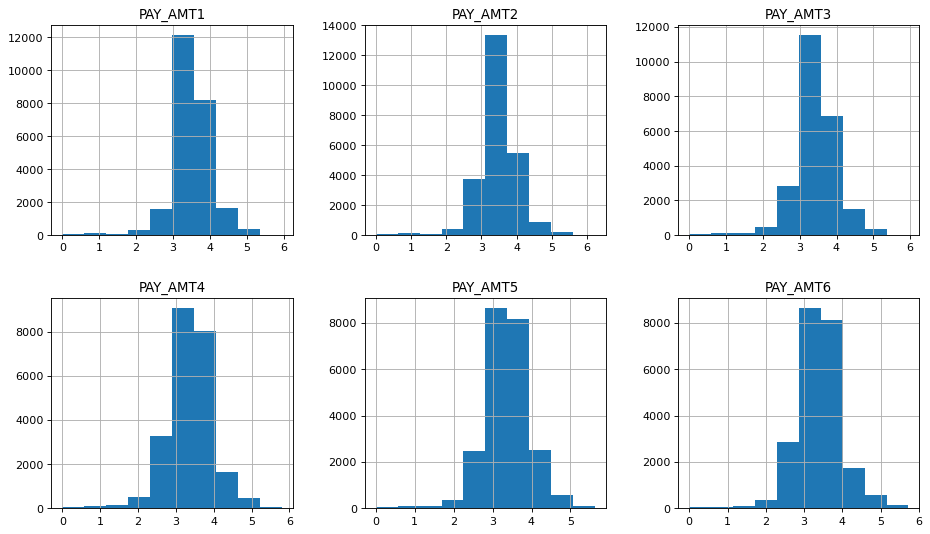

In [37]:
pay_zero_mask = df[pay_amt_feats] == 0
print(pay_zero_mask.sum())
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3),figsize=(14,8));

In [38]:
from sklearn.linear_model import LogisticRegression

Calculating the True and False Positive and Negative Rates and Confusion Matrix in Python

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        df['EDUCATION'].values.reshape(-1,1), df['default_payment_next_month'].values,
                                        test_size=0.2, random_state=24)

In [40]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.8007452 , 0.1992548 ],
       [0.77942903, 0.22057097],
       [0.8007452 , 0.1992548 ],
       ...,
       [0.8007452 , 0.1992548 ],
       [0.75652584, 0.24347416],
       [0.77942903, 0.22057097]])

In [42]:
N = sum(y_test==0)
N

4654

In [43]:
TN = sum((y_test==0) & (y_predict==0))
TN

4654

In [44]:
FP = sum((y_test==0) & (y_predict==1))
FP

0

In [45]:
TNR = TN/N
FPR = FP/N
print(TNR, FPR)

1.0 0.0


In [46]:
FN = sum((y_test==1) & (y_predict==0))
FN

1346

In [47]:
from sklearn import metrics

In [48]:
metrics.confusion_matrix(y_test,y_predict)

array([[4654,    0],
       [1346,    0]], dtype=int64)

In [49]:
np.sum(y_pred_proba,1)
pos_proba = y_pred_proba[:,1]

In [50]:
fpr,tpr,thresholds = metrics.roc_curve(y_test, pos_proba)

In [51]:
fpr

array([0.        , 0.00236356, 0.01525569, 0.02127202, 0.18091964,
       0.63107005, 0.98581865, 1.        ])

In [52]:
tpr

array([0.00000000e+00, 7.42942051e-04, 1.48588410e-03, 2.97176820e-03,
       1.97622585e-01, 6.88707281e-01, 1.00000000e+00, 1.00000000e+00])

In [53]:
thresholds

array([1.32128405, 0.32128405, 0.29390497, 0.267938  , 0.24347416,
       0.22057097, 0.1992548 , 0.17952416])

# 2. Examining the Relationships between Features and the Response

## 2.1. Feature Selection based on EDA.

In [54]:
feature_res = clean_df.columns.tolist()
feature_res

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default_payment_next_month',
 'graduate_school',
 'high_school',
 'others',
 'university']

We are not to use the gender variable due to ethical concerns, and we
learned that PAY_2, PAY_3, …, PAY_6 are incorrect and should be ignored. Also, we are not
going to examine the one-hot encoding we created from the EDUCATION variable, since
the information from those columns is already included in the original feature, at least
in some form. We will just use the EDUCATION feature directly. Finally, it makes no sense
to use ID as a feature, since this is simply a unique account identifier and has nothing to
do with the response variable

In [55]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'graduate_school', 
                   'high_school','others', 'university']

In [56]:
features_response = [item for item in feature_res if item not in  items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default_payment_next_month']

### Pearsons correlation

Pearson correlation is used to measure the strength and direction (that is,positive or negative) of the linear relationship between two variables. .corr() provides linear correlation.

All the correlations are between -1 and 1

In [57]:
cor = clean_df[features_response].corr()

In [58]:
cor.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365


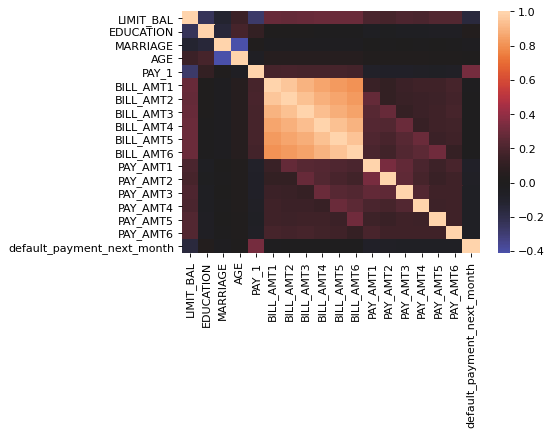

In [59]:
sns.heatmap(cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values,center=0);
# the center of
# colorbar should be 0, so that positive and negative correlation are distinguishable as red
# and blue, respectively.

## 2.2  Optimum Feature based on F-Test

In [60]:
X = clean_df[features_response].iloc[:,:-1].values
y = clean_df[features_response].iloc[:,-1].values

In the context of the F-test, the p-value answers the question: "For the samples in the
positive class, how likely is it that the average value(mean) of this feature is the same as that
of samples in the negative class?" If a feature has very different average values(mean) between
the positive and negative classes, it will:

• Be very unlikely that those average values are the same (low p-value)

• Probably be a good feature in our model because it will help us discriminate
between positive and negative classes

In [61]:
from sklearn.feature_selection import f_classif

In [62]:
[f_stat, f_p_value] = f_classif(X,y)

Let's create a new DataFrame
containing the feature names and these outputs, to facilitate our inspection

In [63]:
f_test_df = pd.DataFrame({'feature_name':features_response[:-1], 'F_static':f_stat,'p_value':f_p_value})
f_test_df.sort_values(by='p_value')

,feature_name,F_static,p_value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


Note that for every decrease in p-value, there is an increase in the F-statistic,
so the information in these columns is essentially the same in terms of ranking
features.

The conclusions we can draw from the DataFrame of F-statistics and p-values are
similar to what we observed in the correlation plot: PAY_1 and LIMIT_BAL appear
to be the most useful features. They have the smallest p-values, indicating the
average values of these features between the positive and negative classes are
significantly different, and these features will help predict which class a sample
belongs to.

if we wanted to retrieve only the 20% of features with the highest F-statistics, we can do
this easily with the "SelectPercentile" class. Also note there is a similar class
for selection the top "k" features (where k is any number you specify), called
"SelectKBest". Here we demonstrate how to select the top 20%.

In [64]:
#To select the top 20% of features according to the F-test, first import the SelectPercentile class
from sklearn.feature_selection import SelectPercentile


In [65]:
# Instantiate an object of this class, indicating we'd like to use the same feature selection criteria, ANOVA F-test, \
#that we've already been considering in this exercise, and that we'd like to select the top 20% of featuress
selector = SelectPercentile(f_classif, percentile = 20)

In [66]:
#Use the .fit method to fit the object on our features and response data, similar to how a model would be fit:

selector.fit(X,y)

SelectPercentile(percentile=20,
                 score_func=<function f_classif at 0x000002A121D628B8>)

There are several ways to access the selected features directly, which you may
learn about in the scikit-learn documentation (that is, the .transform method,
or in the same step as fitting with .fit_transform). However, these methods will
return NumPy arrays, which don't tell you the names of the features that were
selected, just the values. For that, you can use the ".get_support" method of the
feature selector object, which will give you the column indices of the feature array
that were selected.

In [67]:
# capturing the indices of the selected features
best_features_ix = selector.get_support()
best_features_ix 
#The output should appear as follows, indicating a logical index that can be used with an array of feature_names, 
#as well as values, assuming they're in the same order as the features array supplied to "SelectPercentile"

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [68]:
best_features = [features_response[counter] for counter in range(len(features_response)-1) if best_features_ix[counter]==True ]

In [69]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

### 2.2.1. fitting Logistic regression model on Features selected using F-test

Lets, fit Logistic Regression model on optimum features and plot ROC-AUC curve

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test,y_train, y_test = train_test_split(
                                    clean_df[['PAY_1','LIMIT_BAL']].values, clean_df['default_payment_next_month'].values,
                                    test_size=0.2 , random_state = 24)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred = lr_model.predict(X_test)

In [75]:
y_pred_prob = lr_model.predict_proba(X_test)
y_pred_prob
#clean_df.shape

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

In [76]:
print(lr_model.coef_, lr_model.intercept_)

[[ 8.27451187e-11 -6.80876727e-06]] [-6.57647457e-11]


In [77]:
ones_and_features = np.hstack([np.ones((X_test.shape[0],1)), X_test])
ones_and_features

array([[ 1.0e+00,  2.0e+00,  1.6e+05],
       [ 1.0e+00,  1.0e+00,  5.0e+04],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00, -1.0e+00,  5.0e+04],
       [ 1.0e+00,  1.0e+00,  2.3e+05],
       [ 1.0e+00,  2.0e+00,  1.0e+05]])

In [78]:
intercepts_and_coeff = np.concatenate([lr_model.intercept_.reshape(1,1), lr_model.coef_], axis=1)

In [79]:
X_lin_comb = np.dot(intercepts_and_coeff, ones_and_features.T )


In [80]:
def sigmoid(X):
    return (1/(1+np.exp(-X)))
y_pred_proba_manual =  sigmoid(X_lin_comb)

In [81]:
y_pred_manual = y_pred_proba_manual >= 0.5


In [82]:
y_pred.shape


(5333,)

In [83]:
y_pred_manual.shape


(1, 5333)

In [84]:
np.array_equal(y_pred.reshape(1,-1), y_pred_manual)


True

### 2.2.2. Plotting ROC curve and finding AUC 

In [85]:
from sklearn.metrics import roc_auc_score

In [86]:
roc_auc_score(y_test, y_pred_proba_manual.reshape(y_pred_proba_manual.shape[1]))


0.627207450280691

In [87]:
y_pred_prob[:,1].shape

(5333,)

In [88]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.627207450280691

In [89]:
y_pred_proba_manual

array([[0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
        0.33606565]])

In [90]:
from sklearn import metrics

In [91]:
y_pred_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

In [92]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1] )

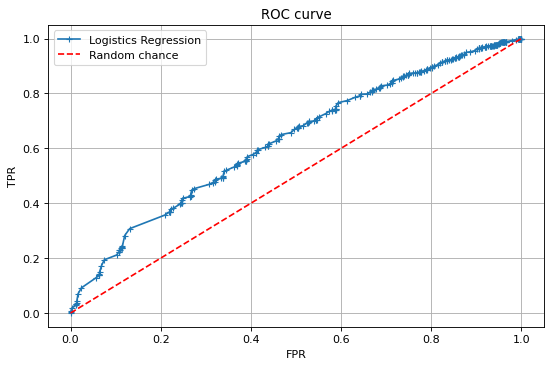

In [93]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr,'+-')
plt.plot([0,1], [0,1],'r--')
plt.legend(['Logistics Regression','Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('ROC curve');

# 3.Cross-Validation and Feature Engineering

## 3.1. Cross-Validation on Logistic Regression

In [94]:
features = features_response[:-1]
features


['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [95]:
X =clean_df[features].values
print(X.shape)
X

(26664, 17)


array([[ 20000,      2,      1, ...,      0,      0,      0],
       [120000,      2,      2, ...,   1000,      0,   2000],
       [ 90000,      2,      2, ...,   1000,   1000,   5000],
       ...,
       [ 30000,      2,      2, ...,   4200,   2000,   3100],
       [ 80000,      3,      1, ...,   1926,  52964,   1804],
       [ 50000,      2,      1, ...,   1000,   1000,   1000]], dtype=int64)

In [96]:
# train/ Test split
X_train, X_test, y_train, y_test = train_test_split(X,clean_df['default_payment_next_month'].values,
                                                    
                                                   test_size=0.2, random_state=24)

In [97]:
print(X_train.shape)
print(X_test.shape)

(21331, 17)
(5333, 17)


In [98]:
# inoder to use saga solver in logistic regression we need min max solver

from sklearn.preprocessing import MinMaxScaler


In [99]:
min_max_sc = MinMaxScaler()

In [100]:
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)

In [101]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
from sklearn.pipeline import Pipeline

In [103]:
scale_lr_pipeline = Pipeline(steps = [('scaler', min_max_sc), ('model', lr)])

In [104]:
scale_lr_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('model',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=1000,
                      multi_class='auto', n_jobs=None, penalty='l1',
                      random_state=None, solver='saga', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l1',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fi

In [105]:
scale_lr_pipeline.get_params()['model__C']  #you can access the parameters of steps of a pipeline by using '__’

1.0

In [106]:
scale_lr_pipeline.set_params(model__C=2)# example of how u can set C value for logistic regression in a pipeline

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=2, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [107]:
C_val_exponents = np.linspace(2,-3, 6)
C_val_exponents

array([ 2.,  1.,  0., -1., -2., -3.])

In [108]:
C_vals = np.float(10)**C_val_exponents
C_vals

array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [109]:
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X,Y):
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)
    pipeline.set_params(model__max_iter = 10000)
    i=0
    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        pipeline.set_params(model__C = C_vals[c_val_counter])
        #Count folds for each value of C
        fold_counter = 0
        i+=1
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            pipeline.fit(X_cv_train, y_cv_train)
            print(i)
            #Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [139]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

n_folds = 4
k_folds = KFold(n_splits=n_folds, shuffle=False)
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train,y_train)

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation')

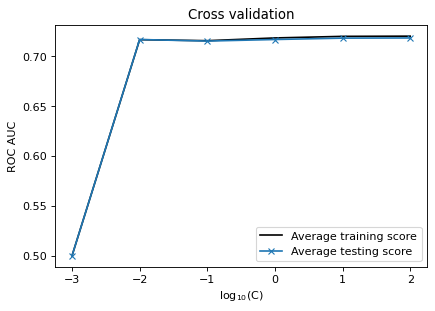

In [140]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0),
         '-0', label="Average training score")
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation')

In [141]:
np.mean(cv_test_roc_auc, axis=0)

array([0.71816275, 0.71800631, 0.71662876, 0.7150653 , 0.71661792,
       0.5       ])

notice that regularization does not impart much benefit here, as
may be expected. While we are able to increase model performance over our
previous efforts by using all the features available, it appears there is no overfitting
going on. Instead, the training and testing scores are about the same. Instead of
overfitting, it's possible that we may be underfitting. Let's try engineering some
interaction features to see if they can improve performance

sometimes we may underfit the model using only the 17 features that came
with the data. One strategy to deal with this is to engineer new features. Some simple
feature engineering that we've discussed is to use interaction, or polynomial features.
Polynomials may not make sense given the way that some of the data has been
encoded; for example, -12 = 1, which may not be sensible for PAY_1. However, we may
wish to try creating interaction features to capture the relationships between features.
PolynomialFeatures can be used to create interaction features only, without polynomial
features.

## 3.2. Using Polynomial features to create new interaction features

In [142]:
from sklearn.preprocessing import PolynomialFeatures

In [143]:

# interaction_only takes a Boolean value (setting it to True implies that only interaction features are created), and
# so does inlcude_bias, which adds an intercept to the model (the default value is False,
# which is correct here as the logistic regression model will add an intercept).

make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)
X_interactions = make_interactions.fit_transform(X)


In [144]:
X_interactions.shape

(26664, 154)

In [145]:
X_train, X_test, y_train, y_test = train_test_split( X_interactions, 
                                                    clean_df['default_payment_next_month'].values,
                                                    test_size=0.2, random_state=24)


In [146]:

print(X_train.shape)
print(X_test.shape)

(21331, 154)
(5333, 154)


In [ ]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

In [ ]:

plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

Engineering the interaction features increases the best model testing score to about
ROC AUC = 0.74 on average across the folds, from about 0.72 without including
interactions. These scores happen at C = 100  (log10(C)=2), that is, with negligible regularization. On
the plot of training versus testing scores for the model with interactions, you can see
that the training score is a bit higher than the testing score, so it could be said that
some amount of overfitting is going on. However, we cannot increase the testing score
through regularization here, so this may not be a problematic instance of overfitting. In
most cases, whatever strategy yields the highest testing score is the best strategy.

# Using Decision Tree algorithm

In [111]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib as mpl #add'l plotting functionality

import graphviz #to visualize decision trees

In [112]:
X_train, X_test, y_train, y_test = train_test_split(clean_df[features_response[:-1]].values,
                                                    clean_df['default_payment_next_month'].values,
                                                    test_size=0.2, random_state=24)

In [113]:
dt = tree.DecisionTreeClassifier(max_depth = 2)
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True,
                                feature_names=features_response[:-1], proportion=True,
                               class_names=['Not defaulted', 'Defaulted'])




***description of .export method***:
we need to say which trained model we'd like to graph, which we've got in the
dt object. Next, we say we don't want an output file: out_file=None. Instead, we
provide the dot_data variable to hold the output of this method. The rest of the
options are used as follows:
1. filled=True: Each node will be filled with a color.
2. rounded=True: The nodes will appear with rounded edges as opposed to rectangles.
3. feature_names=features_response[:-1]: The names of the features from our list will be used as opposed to generic names such as X[0]
4. proportion=True: The proportion of samples in each node will be displayed 
5. class_names=['Not defaulted', 'Defaulted']: The name of the predicted class will be displayed for each node.
  
  
***What is the output of this method?***
If you examine the contents of dot_data, you will see that it is a long text string.
The graphviz package can interpret this text string to create a visualization.

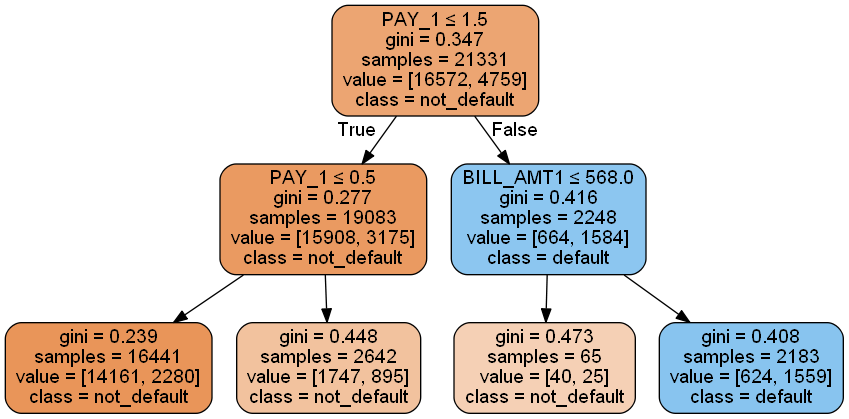

In [118]:
#Use the .Source method of the graphviz package to create an image from dot_data and display it
from sklearn.externals.six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features_response[:-1],class_names=['not_default','default'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Default Classification.png')
Image(graph.create_png())


# GridSearch CV for a decision tree

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
X_train.shape

(21331, 17)

***Goal: the best maximum depth of tree, using the max_depth parameter.***
    
the best maximum depth of tree, using the max_depth parameter.

With 21,331 training samples and 4-fold cross-validation, there will be three-fourth
of the samples, or about 16,000 samples, in each training fold.

we know a tree that splits at every node before the last level, with n levels, has 2^n leaf
nodes. Therefore, a tree with L leaf nodes has a depth of approximately log2(L). In
the limiting case, if we grow the tree deep enough so that every leaf node has one
training sample for a given fold, the depth will be log2(16,000) ≈ 14. So, 14 is the
theoretical limit to the depth of a tree that we could grow in this case.

In [124]:
# defining a list of hyperparameter(max_depth) values 

params = {'max_depth':[1,2,4,6,8,10,12]} 

In [125]:
# instantiate GridSearch class

cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc', n_jobs=None
                  , refit=True, cv=4, verbose=1, pre_dispatch=None,
                 error_score=np.nan, return_train_score=True)

we use the ROC AUC metric (scoring='roc_auc'), that we do a 4-fold cross-validation (cv=4), and that we
calculate training scores (return_train_score=True) to assess the bias-variance trade-off.

n_jobs = int or None :no of processing jobs to run in parallel.


verbose =int : contrls how much output you will see from the cross validation procedure

error_score = 'raise' or Numeric : what to do if error happens during model_fitting

In [126]:
# Once the cross-validation object is defined, we can simply use the .fit method
# on it as we would with a model object. This encapsulates essentially all the
# functionality of the cross-validation loop

#Perform a 4-fold cross-validation to search for the optimal maximum depth
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    7.2s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_

We had
4 folds and 7 hyperparameters, meaning 4 x 7 = 28 fits are performed. The amount
of time this took is also displayed. You can control how much output you get from
this procedure with the verbose keyword argument; larger numbers mean more
output.

### Examinig the results of CrossValidation procedure 

Among the
methods that are available on the fitted GridSearchCV object is ***.cv_results_***. This
is a dictionary containing the names of results as keys and the results themselves
as values. For example, the ***mean_test_score*** key holds the average testing score
across the folds for each of the seven hyperparameters

In [127]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.034223,0.001146,0.003562,0.002248,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.077085,0.016290,0.005870,0.003144,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.188316,0.011347,0.007008,0.002146,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.254339,0.006273,0.006027,0.002000,6,{'max_depth': 6},0.744848,0.746741,0.749603,0.740774,0.745491,0.003207,1,0.782202,0.780044,0.775228,0.774750,0.778056,0.003165
4,0.332702,0.016990,0.007097,0.001792,8,{'max_depth': 8},0.726892,0.731499,0.750515,0.730880,0.734946,0.009161,3,0.811734,0.808353,0.803345,0.802046,0.806370,0.003891
5,0.365875,0.062617,0.006759,0.000741,10,{'max_depth': 10},0.710611,0.704172,0.720132,0.711740,0.711664,0.005678,4,0.849481,0.854355,0.841293,0.836358,0.845372,0.006991
6,0.433922,0.029171,0.006841,0.001983,12,{'max_depth': 12},0.675103,0.660306,0.673778,0.681663,0.672712,0.007760,6,0.887800,0.903188,0.885731,0.875397,0.888029,0.009933


The DataFrame has one row for each combination of hyperparameters in the grid.
Since we are only searching one hyperparameter here, there is one row for each
of the seven values that we searched for

The columns in the cross-validation results DataFrame include the testing scores
for each fold, their average and standard deviation, and the same information for
the training scores.
Generally speaking, ***the "best" combination of hyperparameters is that with the
highest average testing score.*** This is an estimation of how well the model, fit using
these hyperparameters, could perform when scored on new data

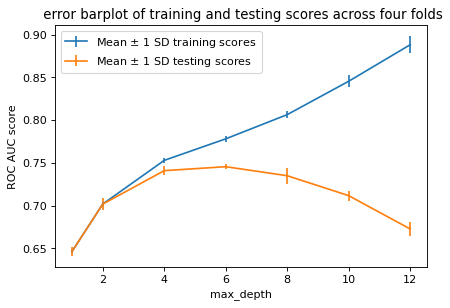

In [128]:
#Let's make a plot showing how the average testing score varies with the max_depth hyperparameter.
# We will also show the average training scores on the same plot, to see how bias
# and variance change as we allow deeper and more complex trees to be grown
# during model fitting.


# ****Error bars are graphical representations of the variability of data and used on graphs to indicate
# the error or uncertainty in a reported measurementError .bars often represent one standard deviation of
# uncertainty, one standard error, or a particular confidence interval (e.g., a 95% interval).****

#***We include the standard deviations of the 4-fold training and testing scores as error bars***

ax=plt.axes()
ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_train_score'],
           yerr = cv_results_df['std_train_score'], label = 'Mean $\pm$ 1 SD training scores ')

ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'],
           yerr = cv_results_df['std_test_score'], label = 'Mean $\pm$ 1 SD testing scores ')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC score')
plt.title(" error barplot of training and testing scores across four folds");


things to take care of while using error bar plots:
1. The standard deviations of the training and testing scores are shown as vertical lines at
    each value of max_depth that was tried; the distance above and below the average score
    is 1 standard deviation. Whenever making error bar plots, it's best to ensure that the
    units of the error measurement are the same as the units of the y axis. In this case they
    are, since standard deviation has the same units as the underlying data, as opposed to
    variance, for example, which has squared units.


2. The error bars indicate how variable the scores are across folds. If there was a large
    amount of variation across the folds, it would indicate that the nature of the data across
    the folds was different in a way that affected the ability of our model to describe it. This
    could be concerning because it would indicate that we may not have enough data to
    train a model that would reliably perform on new data. However, in our case here, there
    is not much variability between the folds, so this is not an issue

observations from plot:
1. We can see that as we grow deeper and deeper trees, the model fits the training data better and better
2. if we grew trees deep enough so that each leaf node had just one training sample, we create a model that
   is very specific to the training data. In fact, it would fit the training data perfectly ( extremely high 
   variance).
3. Shallower trees have more bias, since they are not fitting the training data as well. But this is fine
    because if we accept some bias, we will have better performance on the
    testing data, which is ultimately the metric we use to select model hyperparameters   

***we got an average testing ROC AUC of 0.718 with logistic regression
and 0.740 by engineering interaction features in a logistic regression. Here, with a
decision tree, we can achieve 0.745. So, we are making gains in model performance***

# Random Forest Model


***Random forests reduce the high variance (overfitting) issue that affects decision trees***
There are two principle ways in which the trees are different in the forest :
1. The number of features considered at each split
2. The samples used to grow different trees    

1.  ***The number of features considered at each split:***  We left max_features at its default
    value of None, which meant that all features were considered at each split. By using all
    the features to fit the training data, overfitting is possible. By limiting the number of
    features considered at each split, some of the decision trees in a random forest will
    potentially find better splits. This is because, although they are still greedily searching
    for the best split, they are doing it with a limited selection of features.
    
    ***the default setting is 'auto', which means the algorithm will only
    search a random selection of the square root of the number of possible features at
    each split***, for example a random selection of √9 = 3 features from a total of 9 possible
    features. Because each tree in the forest will likely choose different random selections
    of features to split as the trees are being grown, the trees in the forest will not be the
    same.

2. ***The samples used to grow different trees*** : use bootstrapped aggregation {bootstrapping, Bagging}.
    In the case of random forest, bagging is turned on by default and the bootstrap option is set to True.
    But if you want all the trees in the forest to be grown using all of the training data, you can set this
    option to False.

    hyper parameter:

    1. n_estimators : how many decision tree models will be included in a random forest.As the number of trees
        increases, the variance of the overall ensemble will decrease. This should result in the
        random forest model having better generalization to new data, which will be reflected
        in increased testing scores. However, there will be a point of diminishing returns after
        which increasing the number of trees does not result in a substantial improvement in
        model performance.

***Approach to combine the trees predictions in scikit learn***


One intuitive approach to combining the predictions of these trees into the
ultimate prediction of the forest is to take a majority vote. That is, whatever the most
common prediction of all the trees is becomes the prediction of the forest. However, scikit-learn
uses a somewhat different approach: adding up the predicted probabilities for each class and
then choosing the one with the highest probability. This captures more information
from each tree than just the predicted class.

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
# instantiating the class with following options

rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3, min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features = 'auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                           bootstrap=True, oob_score=True, n_jobs=None, random_state=4, verbose=0,
                           warm_start= False, class_weight=None)

Here, we are only going to explore the effect of using different
numbers of trees

* oob_score, a bool: This option controls whether or not to calculate an out of bag
    (OOB) score for each tree. This can be thought of as a testing score, where the
    samples that were not selected by the bagging procedure to grow a given tree
    are used to assess model performance of that tree. Here, use True to calculate the
    OOB score or False (the default) not to.
* warm_start, a bool: This is False by default – if you set this to True, then reusing
    the same random forest model object will cause additional trees to be added to the
    already-generated forest.

In [131]:
rf_params_ex = {'n_estimators': [2,4,8,10, 100, 200, 400, 600, 1000]}
rf_params_ex

{'n_estimators': [2, 4, 8, 10, 100, 200, 400, 600, 1000]}

In [132]:
#Instantiate a grid search cross-validation object for the random forest model using the parameter grid

cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, refit=True, cv=4, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [133]:
#Fit the cross-validation object
cv_rf_ex.fit(X_train, y_train)


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\nehat4\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nehat4\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\nehat4\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nehat4\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\nehat4\Anaconda3\lib\site-packages\sklearn

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=True, random_state=4,
                                        

In [134]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
cv_rf_ex_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.051843,0.009273,0.004873,0.001227,2,{'n_estimators': 2},0.727157,0.735917,0.748135,0.757570,0.742195,0.011589,9,0.752497,0.751164,0.742885,0.741829,0.747094,0.004775
1,0.119474,0.016621,0.009863,0.001366,4,{'n_estimators': 4},0.735618,0.741684,0.762903,0.765812,0.751504,0.013072,8,0.762966,0.760539,0.752175,0.755926,0.757901,0.004162
2,0.343053,0.059859,0.020982,0.003460,8,{'n_estimators': 8},0.741525,0.746772,0.771033,0.770287,0.757404,0.013387,6,0.767691,0.765325,0.759484,0.761825,0.763581,0.003154
3,0.347895,0.060577,0.026686,0.015866,10,{'n_estimators': 10},0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,7,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
4,3.227427,0.286098,0.091047,0.008596,100,{'n_estimators': 100},0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,3,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750
5,5.767212,0.144487,0.180646,0.009911,200,{'n_estimators': 200},0.747454,0.753057,0.777644,0.771729,0.762471,0.012550,5,0.774453,0.773534,0.766139,0.767404,0.770382,0.003653
6,11.583306,0.371750,0.355934,0.022657,400,{'n_estimators': 400},0.748599,0.752956,0.777437,0.771400,0.762598,0.012110,4,0.774400,0.773684,0.766355,0.767688,0.770532,0.003551
7,18.885033,0.778797,0.532570,0.056262,600,{'n_estimators': 600},0.748553,0.753100,0.778115,0.771988,0.762939,0.012409,2,0.774773,0.773660,0.766400,0.767907,0.770685,0.003593
8,30.172926,0.883620,0.966404,0.109141,1000,{'n_estimators': 1000},0.748316,0.753561,0.778600,0.772425,0.763226,0.012617,1,0.774923,0.773912,0.766679,0.768292,0.770951,0.003531


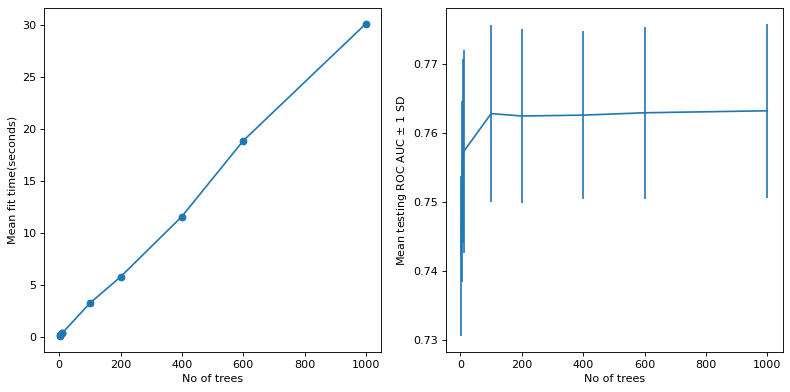

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].plot(cv_rf_ex_results_df['param_n_estimators'],
             cv_rf_ex_results_df['mean_fit_time'], '-o')
axes[0].set_xlabel('No of trees')
axes[0].set_ylabel('Mean fit time(seconds)')

axes[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axes[1].set_xlabel('No of trees')
axes[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

along with these higher model testing scores, notice that there is also
more variability between the folds than what we saw with the decision tree; this
variability is visible as larger standard deviations in model testing scores across
the folds. While this indicates that there is a wider range in model performance
that might be expected from using this model.

In [136]:
cv_rf_ex.best_params_ #"best" just means the hyperparameters that resulted in the highest average model testing score

{'n_estimators': 1000}

In [137]:
feat_imp_df = pd.DataFrame({'Feature_name':features_response[:-1],
                            'Importance':cv_rf_ex.best_estimator_.feature_importances_})
feat_imp_df.sort_values(by='Importance', ascending=False)

,Feature_name,Importance
4,PAY_1,0.573142
0,LIMIT_BAL,0.092378
11,PAY_AMT1,0.091762
12,PAY_AMT2,0.055416
13,PAY_AMT3,0.046362
14,PAY_AMT4,0.026057
16,PAY_AMT6,0.019452
6,BILL_AMT2,0.018205
7,BILL_AMT3,0.014953
15,PAY_AMT5,0.014606


The feature importance came from the best_estimator_ method of the fitted crossvalidation
object. This is a way to access the random forest model object, that was
trained on all the training data, using the best hyperparameters we viewed in the
previous step. feature_importances_ is a method that can be used on fitted random
forest models

## Checkerboard Graph for visualisation of GridSearchCV


In our case it is used to visualize model testing scores over a grid of two hyperparameters.


USE:
Plotting a two-dimensional grid with colored squares or other shapes on it, can be
useful when you want to show three dimensions of data. Here, color illustrates the third
dimension.

Goal : will conduct a grid search over the ***number of trees in the forest
(n_estimators)*** and the ***maximum depth of a tree (max_depth)*** for a random forest model
and then create a visualization showing the average testing
score for the grid of hyperparameters that you searched over.

In [144]:
# rf_params = {'max_depths':[3,6,9,12],'n_estimators':[10, 50, 100, 200]}

rf_param = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [145]:

cv_rf = GridSearchCV(rf, param_grid=rf_param, scoring='roc_auc',
                  n_jobs=-1, refit=True, cv=4, verbose=2,
                  error_score=np.nan, return_train_score=True)


In [146]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=True, random_state=4,
                                        

In [147]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)
cv_rf_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.416001,0.033347,0.018000,0.004473,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,15,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,1.860001,0.066513,0.073000,0.015589,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,12,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
2,3.652005,0.090376,0.126995,0.011094,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,13,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750
3,5.266003,0.048784,0.163998,0.007482,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747454,0.753057,0.777644,0.771729,0.762471,0.012550,14,0.774453,0.773534,0.766139,0.767404,0.770382,0.003653
4,0.408001,0.012649,0.014000,0.002000,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.752905,0.758904,0.780036,0.774017,0.766466,0.010980,11,0.795911,0.796476,0.793695,0.796446,0.795632,0.001141
5,2.022002,0.033165,0.050000,0.004472,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.760089,0.765251,0.788567,0.778669,0.773144,0.011193,8,0.807081,0.805109,0.799176,0.801229,0.803149,0.003113
6,3.902997,0.049106,0.089001,0.001732,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.760964,0.765515,0.788793,0.778936,0.773552,0.011004,7,0.808194,0.806130,0.800846,0.803123,0.804573,0.002808
7,7.497002,0.059153,0.197000,0.014249,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.761481,0.765319,0.787854,0.779745,0.773600,0.010682,6,0.808276,0.806853,0.800682,0.804006,0.804954,0.002906
8,0.554001,0.021633,0.018000,0.004473,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.757853,0.755444,0.781544,0.773823,0.767166,0.010899,10,0.854161,0.856197,0.850317,0.852039,0.853178,0.002211
9,2.557002,0.015066,0.060000,0.006324,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.763956,0.764420,0.786690,0.780255,0.773830,0.009908,4,0.867242,0.871380,0.868213,0.867390,0.868557,0.001672


In [148]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
print(xx_rf)
print(yy_rf)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [149]:
cm_rf = plt.cm.jet

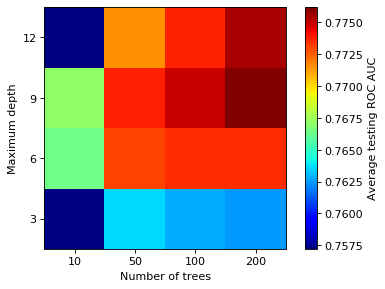

In [217]:
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)),cmap = cm_rf)
plt.colorbar(pcolor_graph, label="Average testing ROC AUC")
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_param['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_param['max_depth']]);

In [139]:
cv_rf.best_params_

NameError: name 'cv_rf' is not defined

In [ ]:
feat_imp_df = pd.DataFrame({'Feature_Name':features_response[:-1],
                            'Importance': cv_rf.best_estimator_.feature_importances_})


In [ ]:
feat_imp_df.sort_values('Importance', ascending=False)

# Dealing with Missing Data: Imputation Strategies

Instead of ignoring the samples with
missing data, another option is to use some method to fill in missing values of affected
features. This filling in is known as imputation.

### Cleaning the dataset

In [151]:
df1 = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')

df1.rename({'default payment next month':'default_payment_next_month'},axis=1,inplace=True)
df1.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [152]:
# identify and drop all the samples whose all features are zero

df_zero_mask = df1==0
feature_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_mask)


315

In [153]:
df_clean1 = df1.loc[~feature_mask, :].copy()
df_clean1.shape
clean_df.shape

(26664, 29)

In [154]:
df_clean1['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean1['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [155]:
df_clean1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [156]:
# using  a boolean mask to identify "Not available" values

missing_pay1_mask = df_clean1['PAY_1'] == 'Not available'

# convert numbers in EDUCATION column to their respective category
mapping = {1: 'graduate_school', 2 :'university', 3 : 'high_school', 4: 'others'}
ss = df_clean1['EDUCATION'].map(mapping)
set1 = pd.get_dummies(ss)  # using one hot encoding 
#concatenate set1 with clean_df dataset
df_clean1 = pd.concat([df_clean1,set1], axis=1)

# making a copy of these rows in a new dataframe and we will add these later
df_missing_pay1 = df_clean1.loc[missing_pay1_mask,:].copy()


# Method 1: Mode and Random Imputation of PAY_1

we will try some of the simpler imputation strategies available for PAY_1
and see their effects on cross-validation performance

In [157]:
# loading the cleaned dataset again with PAY_1 missign values removed (clean_df)

clean_df.head()  # dataframe with PAY_1 missing values removed


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,graduate_school,high_school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,0,0,0,1


In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(clean_df[features_response[:-1]].values,
                                                    clean_df['default_payment_next_month'].values,
                                                    test_size=0.2, random_state=24)

In [160]:
#Noting down the column number of PAY_1
features_response[4]

'PAY_1'

In [161]:
# finding the mode and median of PAY_1
np.median(X_train[:,4])

0.0

In [162]:
pd.DataFrame(X_train[:,4]).mode()

,0
0,0


Since the median and mode are the same, we only have two imputation strategies
to test: ***the mode/median and a random selection of non-missing***

In [163]:
np.random.seed(1)
fill_values = [0, np.random.choice(X_train[:,4], size=(3021,),replace=True)]

fill_values

[0, array([ 0,  0,  0, ...,  2,  0, -2], dtype=int64)]

In [164]:
#Create a list of names for the imputation strategies to help keep track of them:
fill_strategy = ['mode', 'random']

In [165]:
#Examine the second element of the fill_values list, which is the array of random selections of PAY_1

fill_values[-1]

array([ 0,  0,  0, ...,  2,  0, -2], dtype=int64)

The output looks as expected; these values are integers in the range [-2, 8] as we
know PAY_1 is. However, it would be better to view a summary graphic of all the
imputed values, to compare them to the distribution of PAY_1. This would allow us
to confirm the distributions are the same, as is intended by random imputation
done in this way.

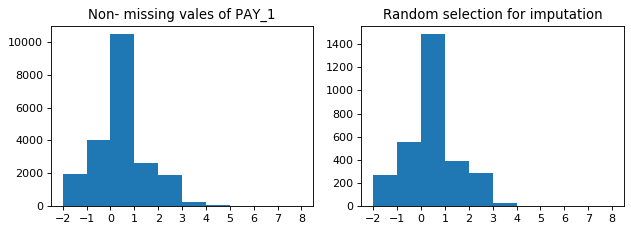

In [166]:
fig , axes = plt.subplots(1,2,figsize=(8,3))
bin_edges  = np.arange(-2,9)
axes[0].hist(X_train[:,4], bins=bin_edges)
axes[0].set_xticks(bin_edges)
axes[0].set_title('Non- missing vales of PAY_1')
axes[1].hist(fill_values[-1],bins=bin_edges)
axes[1].set_title('Random selection for imputation')
axes[1].set_xticks(bin_edges)
plt.tight_layout()

To do cross-validation on the training set, now we need to shuffle since all the samples with missing PAY_1 were concatenated on to the end.

now we will use simpler class called ***cross_validate***, in combination with the ***KFold class***. These classes can help us carry
out cross-validation like GridSearchCV, but do not involve a search over a grid of
hyperparameters.

In [167]:
from sklearn.model_selection import KFold

In [168]:
k_folds = KFold(n_splits=4, shuffle=True,random_state=1 )

In [169]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [170]:
# using best hyper parameter in random forest : 200 trees with maximum depth 9
rf = RandomForestClassifier(n_estimators=200, criterion='gini',max_depth=9,min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0,max_features='auto',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,min_impurity_split=None,                         
                            bootstrap=True,oob_score=False, n_jobs=None, random_state=None,verbose=0,
                            warm_start=False, class_weight=None)

In [171]:
for counter in range(len(fill_values)):
    #Copy the data frame with missing PAY_1 and assign imputed values
    df_fill_pay_1_filled = df_missing_pay1.copy()
    df_fill_pay_1_filled['PAY_1'] = fill_values[counter]
    
    
    #Split imputed data in to training and testing, using the same
    #80/20 split we have used for the data with non-missing PAY_1
    X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
                train_test_split( df_fill_pay_1_filled[features_response[:-1]].values,
                df_fill_pay_1_filled['default_payment_next_month'].values,
                test_size=0.2, random_state=24)
    
    # concatenate the imputed data with the array of non-missing data
    
    X_train_all = np.concatenate((X_train, X_fill_pay_1_train ), axis=0)
    y_train_all = np.concatenate((y_train, y_fill_pay_1_train ), axis=0)
    
    #Use the KFolds splitter and the random forest model to get
    #4-fold cross-validation scores for both imputation methods
    
    imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                          cv=4, n_jobs= -1 ,verbose = 1, return_train_score=True,
                                          return_estimator=True, error_score='raise-deprecating')
    test_score = imputation_compare_cv['test_score']
    print(fill_strategy[counter] + ' imputation: ' +
          'mean testing score ' + str(np.mean(test_score)) +
          ', std ' + str(np.std(test_score)))
    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\nehat4\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   17.8s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   18.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


mode imputation: mean testing score 0.7710087101988695, std 0.011766811380260065
random imputation: mean testing score 0.7675941403123431, std 0.0163235745799424


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   15.5s remaining:   15.5s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.6s finished


This is the step where the model fitting and testing of cross-validation is
conducted, behind the scenes and abstracted away from our view by the cross_
validation class.


n_jobs=-1, indicating to run
jobs in parallel to make things go more quickly.

***The average testing score (ROC AUC) across the four
folds is 0.773 for mode imputation, versus 0.769 using random imputation***


The average testing score with missing values (using random forest) was 0.776. 
So, we have experienced a little degradation in the estimate of out-of-sample model testing
performance. This is to be expected, as we are now including data that has issues and
uncertainties. However, this is still within ```0.006 ROC AUC units of the best score ```we
observed when working with the non-missing data, so it's not too much lower

# Method 2 :A Predictive Model for PAY_1  (model based imputation)

Complex methods like interpolation use additional information
about how "close" a given sample is to other samples, in the spatial or temporal
context, and leverage this for more accurate imputation.

model-based imputation additionally uses all features without missing
values, to predict the missing values of the affected feature. Therefore, model based
imputation is similar to any other predictive model, where ***we consider the
feature with missing values to be the response variable***.

* we would not consider PAY_1 to be a numerical
    feature. Taking an average for imputation, which may lead to a decimal value, will not
    make sense according to the definition of this feature.

* Therefore, when considering what kind of supervised learning model to use
    for PAY_1, we know it should be a classification model.
    However, the classification model for PAY_1 will be multiclass classification problem (include all the levels
    of this variable from -2 through 8)

Goal : predict the PAY_1 missing values based available values for PAY_1
    
steps: 
1. Split the dataframe consisting of missing values of PAY_1 into test and train
2. use the gridCV search on imputed PAY_1 train dataframe
3. interpret the accuracy for train and test
4. if the accuracy of model based trained imputation is higher that mode and random imputation
   predict the values for PAY_1 based on model imputation using random forest model

In [172]:
#create a copy of the cleaned DataFrame with non-missing values of PAY_1.
pay_1_df = clean_df.copy()

# This represents the data available for training and testing, since we know the value of the response variable, PAY_1

In [173]:
# preparing features list for imputation
features_for_imputation = pay_1_df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','EDUCATION_CAT',
                   'graduate school', 'high school','others', 'university', 
                   'default_payment_next_month', 'PAY_1']
features_for_imputation = [item for item in features_for_imputation if item not in items_to_remove]
features_for_imputation

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'graduate_school',
 'high_school']

In [174]:
X_impute_train, X_impute_test, y_impute_train, y_impute_test = \
                                    train_test_split(pay_1_df[features_for_imputation].values,
                                    pay_1_df['PAY_1'].values,
                                    test_size=0.2, random_state=24)

In [175]:
rf_impute_params = {'max_depth':[3, 6, 9, 12],'n_estimators':[10, 50, 100, 200]}

In [176]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
cv_rf_impute = GridSearchCV(rf, param_grid=rf_impute_params, scoring = 'accuracy', refit=True,
                           cv = 4 , verbose=2, error_score=np.nan, return_train_score=True,
                            n_jobs=-1)
#this time we used scoring = accuracy 

#Notice here that we are re-using the random forest model instance 'rf' from the  credit account default model

In [178]:
cv_rf_impute.fit(X_impute_train, y_impute_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.5min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [179]:
cv_rf_impute.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [180]:
cv_rf_impute.best_score_

0.7323614052069177

#### Interpretation of the Accuracy score

In [181]:
pay_1_value_counts = pay_1_df['PAY_1'].value_counts().sort_index()
pay_1_value_counts

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [182]:
pay_1_value_counts / (pay_1_value_counts.sum())

-2    0.092859
-1    0.189281
 0    0.490812
 1    0.122300
 2    0.089184
 3    0.010951
 4    0.002363
 5    0.000863
 6    0.000413
 7    0.000338
 8    0.000638
Name: PAY_1, dtype: float64

from this we can see that '0' consists of 49 % of the whole dataset. hence if we use the mode imputation (0)
for filling missing values we can be correct 49% of the time. 

However, using a model to impute the values of PAY_1, we can be correct 73% ofthe time. 

So, one ***benefit of using model-based imputation is that we can make more accurate fill
values for the unknown values of a feature***.

In [183]:
# predicting  on test set

y_impute_predict = cv_rf_impute.predict (X_impute_test)

In [184]:
from sklearn import metrics 
metrics.accuracy_score(y_impute_test, y_impute_predict)

0.738983686480405

Text(0.5, 1.0, 'model based prediction of PAY_1')

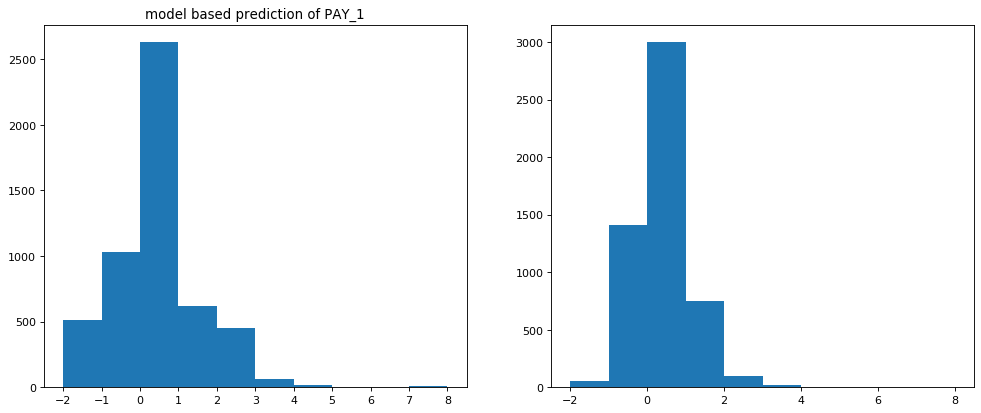

In [185]:
# visualisation of predicted test model results and comparing it with actual values of test model

fig, axes = plt.subplots(1,2,figsize=(15,6))
bin_edges = np.arange(-2,9)
axes[0].hist(y_impute_test, bins = bin_edges)
axes[0].set_xticks(bin_edges)
axes[0].set_title('Non missing values of PAY_1')
axes[1].hist(y_impute_predict,bins=bin_edges)
axes[0].set_xticks(bin_edges)
axes[0].set_title('model based prediction of PAY_1')



This shows that the imputation model is more likely to predict a value of 0
for PAY_1 than it should be. However, it does predict other values and consequently
is more accurate than the mode imputation

# Using the imputation model for PAY_1

In [186]:
#Collect all the values with known PAY_1 to train the final version of the imputation model

X_impute_all = pay_1_df[features_for_imputation].values

y_impute_all =  pay_1_df['PAY_1'].values


In [187]:
rf_impute = RandomForestClassifier(n_estimators=200, max_depth=12)

In [188]:
rf_impute.fit(X_impute_all, y_impute_all)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
# make a copy of the DataFrame with missing PAY_1
df_fill_pay_1_model = df_missing_pay1.copy()
df_fill_pay_1_model.shape

(3021, 29)

In [190]:
#Examine the values of PAY_1, to confirm they represent missing data
df_fill_pay_1_model['PAY_1']

17       Not available
28       Not available
29       Not available
54       Not available
60       Not available
             ...      
29949    Not available
29956    Not available
29967    Not available
29973    Not available
29984    Not available
Name: PAY_1, Length: 3021, dtype: object

In [191]:
df_fill_pay_1_model['PAY_1'] = rf_impute.predict(df_fill_pay_1_model[features_for_imputation].values)

In [192]:
df_fill_pay_1_model['PAY_1'].value_counts().sort_index()

-2      29
-1     762
 0    1730
 1     442
 2      48
 3       7
 5       1
 6       1
 8       1
Name: PAY_1, dtype: int64

we need
to take an 80% sample of these to combine with the model training data for the case
study, to examine how this imputation method affects model performance, as we did for
mode and random imputation.

In [193]:
# Split the model-imputed data :
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
                                    train_test_split ( df_fill_pay_1_model[features_response[:-1]].values,
                                                    df_fill_pay_1_model['default_payment_next_month'].values,
                                                    test_size=0.2, random_state=24 ) 

In [194]:
#Combine this with the data with known PAY_1:

X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
rf #Confirm that the rf object still holds the model with optimal hyperparameters

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [195]:
# use this model with the combined imputed and non-missing training data in 
# cross-validation as we did with the other imputation methods, to test modelbased
# imputation:

imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all,scoring='roc_auc',
                                      cv=4, n_jobs=-1, verbose=1,
                                      return_train_score=True, return_estimator=True,
                                      error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   15.5s remaining:   15.5s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.7s finished


In [196]:
np.mean(imputation_compare_cv['test_score'])

0.7723527525740674

Note:  model and mode imputation perform similarly, and a simple approach is usually advisable unless a more complicated approach clearly gets better results. hence we will use mode based approach for imputation.

In [197]:
# using mode value[0] to fill the PAY_1 values
df_fill_pay_1_model['PAY_1'] = np.zeros_like(df_fill_pay_1_model['PAY_1'].values)

#The zeros_like function of Numpy creates an array of zeros in the same shape as the input array.

In [198]:
# repeat the splitting of imputed data 

X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
                                                    train_test_split(df_fill_pay_1_model[features_response[:-1]].values,
                                                    df_fill_pay_1_model['default_payment_next_month'].values,
                                                    test_size=0.2, random_state=24)

# combine with the non-missing data, this time including the unseen test set
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)

In [199]:
# Just to confirm that the data has been restored to the state it was in when we tested
# mode-based imputation earlier, we run the cross-validation to confirm that we get the
# same score


imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                          cv=4, n_jobs= -1 ,verbose = 1, return_train_score=True,
                                          return_estimator=True, error_score='raise-deprecating')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   13.5s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   13.6s finished


In [200]:
np.mean(imputation_compare_cv['test_score'])

0.7706805728063374

# Confirming Model Performance on the Unseen Test Set

In [201]:
rf.fit(X_train_all, y_train_all)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [202]:
y_test_all_predict_proba = rf.predict_proba(X_test_all)

In [203]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_all, y_test_all_predict_proba[:,1])

0.76838464954203